In [1]:
import pandas
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt 
import glob
from PIL import Image
import random
import keras

In [2]:

HOTDOG_BASE_PATH = "./data/train/hotdog/"

NON_HOTDOG_BASE_PATH = "./data/train/nothotdog/"


hotDogCount = len(os.listdir(HOTDOG_BASE_PATH))
nonHotDogCount = len(os.listdir(NON_HOTDOG_BASE_PATH))
print("hot dog count  = {}".format(hotDogCount))
print("None hot dog count  = {}".format(nonHotDogCount))


hotdogFiles = glob.glob("./data/train/hotdog/*.jpg")
nonHotDogFiles = glob.glob('./data/train/nothotdog/*.jpg')


hot dog count  = 1500
None hot dog count  = 1500


<h2> Loading in Training Data</h2>

In [3]:
TrainData = []

for image in hotdogFiles:
  img  = Image.open(image)
  img = img.resize((128,128))
  imgArray = np.array(img)
  TrainData.append((imgArray,1))


for image in nonHotDogFiles:
  img  = Image.open(image)
  img = img.resize((128,128))
  imgArray = np.array(img)
  TrainData.append((imgArray,0))

random.shuffle(TrainData)


In [4]:
len(TrainData)

3000

<h2> Loading in Testing Data</h2>


In [5]:
testHotDogFiles = glob.glob('./data/test/hotdog/*.jpg')
testNonHotDogFiles = glob.glob('./data/test/nothotdog/*.jpg')
TestData = []

for image in testHotDogFiles:
  img  = Image.open(image)
  img = img.resize((128,128))
  imgArray = np.array(img)
  TestData.append((imgArray,1))


for image in testNonHotDogFiles:
  img  = Image.open(image)
  img = img.resize((128,128))
  imgArray = np.array(img)
  TestData.append((imgArray,0))

random.shuffle(TestData)


In [6]:

len(TestData)

644

In [7]:
Train_X  = np.array([item[0] for item in TrainData])
Train_Y = np.array([item[1] for item in TrainData])


Test_X  = np.array([item[0] for item in TestData])
Test_Y = np.array([item[1] for item in TestData])


Train_X = Train_X.astype('float32')

Test_X = Test_X.astype('float32')


Train_X /=225

Test_X /=225

In [8]:
Train_X[0].shape

(128, 128, 3)

In [9]:
model = keras.Sequential([
    keras.layers.AveragePooling2D((2,2),2,input_shape=(128,128,3)),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.1),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])


In [10]:
model.compile(optimizer ='adam',loss=keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

model.fit(Train_X, Train_Y, epochs = 50, batch_size = 100)


Epoch 1/50


30/30 [==============================] - 4s 88ms/step - loss: 0.6948 - accuracy: 0.5113
Epoch 2/50
30/30 [==============================] - 3s 91ms/step - loss: 0.6893 - accuracy: 0.5397
Epoch 3/50
30/30 [==============================] - 3s 90ms/step - loss: 0.6729 - accuracy: 0.5890
Epoch 4/50
30/30 [==============================] - 3s 88ms/step - loss: 0.6558 - accuracy: 0.6117
Epoch 5/50
30/30 [==============================] - 3s 93ms/step - loss: 0.6374 - accuracy: 0.6500
Epoch 6/50
30/30 [==============================] - 3s 103ms/step - loss: 0.6277 - accuracy: 0.6643
Epoch 7/50
30/30 [==============================] - 3s 88ms/step - loss: 0.6210 - accuracy: 0.6643
Epoch 8/50
30/30 [==============================] - 3s 92ms/step - loss: 0.6103 - accuracy: 0.6787
Epoch 9/50
30/30 [==============================] - 3s 100ms/step - loss: 0.5971 - accuracy: 0.6783
Epoch 10/50
30/30 [==============================] - 3s 93ms/step - loss: 0.5674 - accuracy: 0.7117
Epoc

In [11]:
model.evaluate(Test_X,Test_Y)

21/21 [==============================] - 0s 8ms/step - loss: 0.6978 - accuracy: 0.7158


[0.6977910399436951, 0.7158384919166565]

In [15]:
model.save("model.keras")

21/21 [==============================] - 0s 7ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: num must be an integer with 1 <= num <= 9, not 10

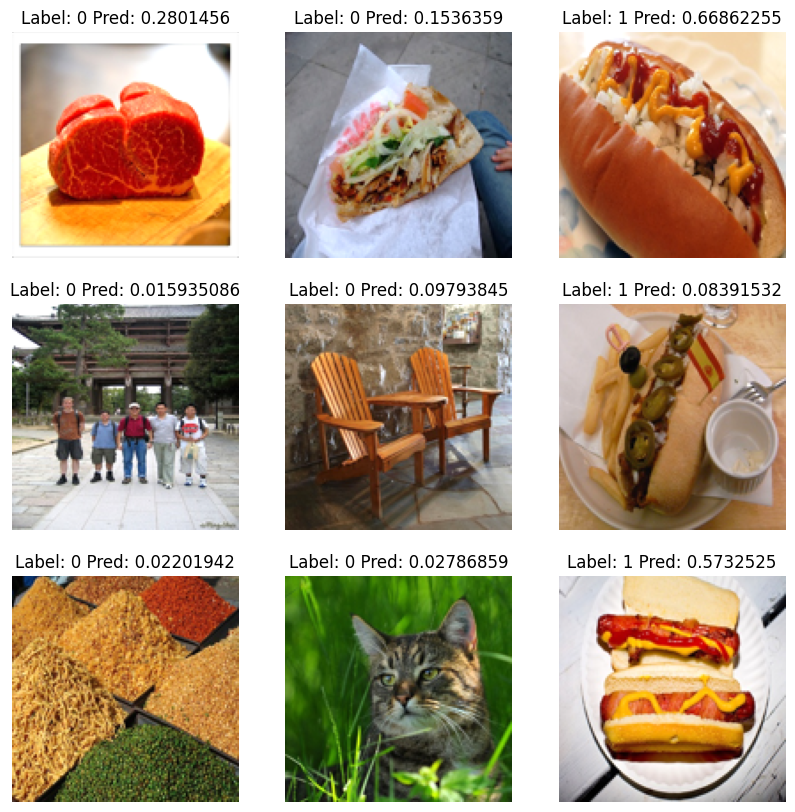

In [17]:
Predictions = model.predict(Test_X)


plt.figure(figsize=(10, 10))
a = 95
for i in range(0,15):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(Test_X[i+a])
    plt.title("Label: "+str(Test_Y[i+a])+" Pred: "+str(Predictions[i+a][0]))
    plt.axis("off")